Putting in the neural network code for testing


In [297]:
#Copypasting the neural network class

import numpy as np
import matplotlib as mpl

class Layer:
	learningRate=0.4
	def __init__(self,inputSize, outputSize, randomSeed=15):
		self.neurons=np.zeros(outputSize)
		self.weights=np.random.rand(outputSize, inputSize)
		self.deltaWeights=np.zeros((outputSize, inputSize))
		self.deltaNeurons=np.zeros(outputSize)
		self.bias=np.zeros(outputSize)

	def sum(self,inputVector):
		self.neurons=np.matmul(self.weights, inputVector)+self.bias
		self.neurons=self.activate()


	def activate(self,deriv=False):
		if (deriv==True):
			return np.multiply(self.neurons,(1-self.neurons))
		return np.divide(1,(1+np.exp(-self.neurons)))


	def backpropagate(self,inputVector, errorVector):
		self.deltaNeurons=np.multiply(errorVector, self.activate(deriv=True))
		self.deltaWeights=np.outer(self.deltaNeurons, inputVector)
		self.weights-=self.learningRate*self.deltaWeights

	def get_weights(self):
		return self.weights

	def get_neurons(self):
		return self.neurons

	def get_bias(self):
		return self.bias


class Network:
	def __init__(self, layers, randomSeed=15):
		self.inputVector=np.zeros(layers[0])
		self.depth=len(layers)
		self.network=[]
		for index, size in enumerate(layers):
			if index==0:
				self.network.append(Layer(0,size,randomSeed))
			else:
				self.network.append(Layer(layers[index-1],size,randomSeed))

	def forwardPropagate(self, inputVector):
		self.inputVector=inputVector
		for index, layer in enumerate(self.network):
			if index==0:
				self.network[0].neurons=inputVector
			else:
				self.network[index].sum(self.network[index-1].neurons)


		

	def backwardPropagate(self, targetVector):
		for index, layer in reversed(list(enumerate(self.network))):
			if index==self.depth-1:
				self.network[index].backpropagate(self.network[index-1].neurons, self.error(targetVector))
			elif index==0:
				errorVector=np.sum( self.network[index+1].deltaWeights*self.network[index+1].weights , 0 )
				#The below line is not necessary(causes bug, as I was planning to start with weights, but decided to ignore the weights of the first layer)
				#self.network[index].backpropagate(self.inputVector, errorVector)
			else:
				errorVector=np.sum( self.network[index+1].deltaWeights*self.network[index+1].weights , 0 )
				self.network[index].backpropagate(self.network[index-1].neurons, errorVector)

	def trainEpoch(self, inputVector, targetVector):
		self.forwardPropagate(inputVector)
		self.backwardPropagate(targetVector)

	def error(self, targetVector):
		return targetVector-self.network[self.depth-1].neurons

	def get_Weights(self, layer, ):
		return self.network[layer].get_weights()


In [298]:
#Initialize test data, import libraries

import matplotlib.pyplot as plt
import math

r=[[],[],[]]
alpha=[[],[],[]]
test = [[],[],[]]

In [299]:
#Create random sample for a specified distribution
for x in range(0, 3):
    r[x]=np.random.random_sample(500)*(x/2+1)
    alpha[x]=np.random.random_sample(500)*2*math.pi
    

In [300]:

#translate radial data into orthogonal coordinate system 
#translate datasets in the orthogonal system
x=r*np.sin(alpha)
y=r*np.cos(alpha)
x[0]=x[0]+5
y[0]=y[0]+10
x[1]=x[1]+3
y[1]=y[1]+4
x[2]=x[2]+1
y[2]=y[2]+8

In [301]:
#Labeling training data output for classification for different areas

targetArray=[[],[],[]]
targetArray[0]=np.concatenate((np.ones(500),np.zeros(1000)))
targetArray[1]=np.concatenate((np.zeros(500),np.ones(500),np.zeros(500)))
targetArray[2]=np.concatenate((np.zeros(500),np.zeros(500),np.ones(500)))
targetArray=np.transpose(targetArray)

In [302]:
#Moving input data into input vector array
#Normalizing input data
inputs = [[],[],[]]
inputs[0]=np.concatenate((x[0],x[1],x[2]))
inputs[1]=np.concatenate((y[0],y[1],y[2]))
inputs[2]=np.zeros(len(inputs[0]))
inputs[0]=(inputs[0]-inputs[0]/inputs[0]*inputs[0].mean())/inputs[0].std()
inputs[1]=(inputs[1]-inputs[1]/inputs[1]*inputs[1].mean())/inputs[1].std()
inputs=np.transpose(inputs)

In [303]:
#Create a random image to test image show ability of python
img = np.random.random([80,80,3])


In [304]:
#Creating a 2-4-3 feedforward neural network for testing
neuralNetwork=Network([3, 4, 3])

In [305]:
import random

print(random.choice(inputs))
print()

[ 1.2935419   1.08949617  0.        ]



In [306]:
#Training the neural network by sampling randomly the input array
epochs=50000

for x_ in range(0,epochs):
    sample=random.randint(0,len(inputs)-1)
    neuralNetwork.trainEpoch(inputs[sample],targetArray[sample])


In [307]:
#Create an equidistant point set over the are we want to inspect
test[0]=np.linspace(-1.7,2.7,80)
test[1]=np.linspace(-2,2,80)

In [308]:
img*=0
for x_, val_x in enumerate(test[0]):
    for y_, val_y in enumerate(test[1]):
        neuralNetwork.forwardPropagate([val_x,val_y, 0])
        index=np.argmax(neuralNetwork.network[2].neurons)
        img[x_,y_,index]=1

No handles with labels found to put in legend.


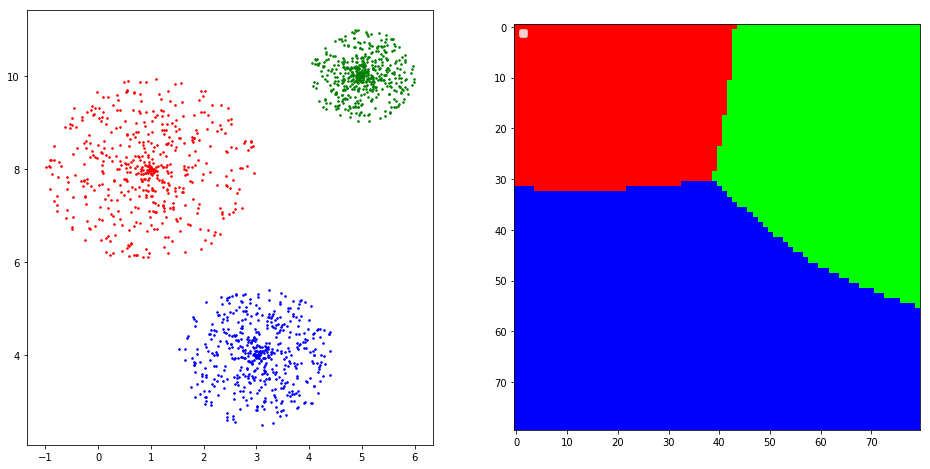

In [309]:
#Plot test data
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img)

ax1.scatter(x[1],y[1], s=10, c='b', marker=".", label='first')
ax1.scatter(x[0],y[0], s=10, c='g', marker=".", label='second')
ax1.scatter(x[2],y[2], s=10, c='r', marker=".", label='third')
ax=ax1
plt.legend(loc='upper left');
plt.show()